In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Dataset Diabetes

Este conjunto de datos proviene originalmente del Instituto Nacional de Diabetes y Enfermedades Digestivas y Renales. El objetivo del conjunto de datos es predecir si un paciente tiene o no diabetes, basándose en ciertas medidas diagnósticas incluidas en el conjunto de datos. Se impusieron varias restricciones en la selección de estas instancias de una base de datos más grande. En particular, todos los pacientes aquí son mujeres mayores de 21 años de herencia india Pima.

## Cargar los datos

Abrir el archivo "diabetes.csv" en la carpeta "data". Analizar su estructura y responder las siguientes preguntas:

*   ¿Cuántas instancias o ejemplos tiene el dataset?
*   ¿Cómo se llama la variable de salida o target? ¿Qué tipo de datos es?
*   ¿Cuántos atributos posee cada instancia o ejemplo?¿Puede detectar datos faltantes en algún atributo?
*   ¿Qué tipo de dato tiene cada atributo?
*   ¿Presenta algún atributo categórico? Si es así, cuántas categorías posee y cuántas instancias tiene en cada categoría.

### ⚠️
Antes de realizar cualquier procesamiento, no olvide de separar los datos en entrenamiento y prueba.

In [3]:
df = pd.read_csv('./data/diabetes.csv')

In [4]:
'separo en entrenamiento y prueba'
from sklearn.model_selection import train_test_split
X = df.drop('Outcome', axis=1)
y = df['Outcome']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

Analice con cuidado el rango de valores de los atributos. ¿Nota valores atípicos a simple vista en algún/algunos de los atributos?

In [5]:
X_train.head()

,Unnamed: 0,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
336,336,0,117,0.0,0.0,0.0,33.8,0.932,44
532,532,1,86,66.0,52.0,65.0,41.3,0.917,29
429,429,1,95,82.0,25.0,180.0,35.0,0.233,43
721,721,1,114,66.0,36.0,200.0,38.1,0.289,21
420,420,1,119,88.0,41.0,170.0,45.3,0.507,26


In [6]:
X_test.head()

,Unnamed: 0,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
6,6,3,78,50.0,32.0,88.0,31.0,0.248,26
649,649,0,107,60.0,25.0,0.0,26.4,0.133,23
712,712,10,129,62.0,36.0,0.0,41.2,0.441,38
640,640,0,102,86.0,17.0,105.0,29.3,0.695,27
191,191,9,123,70.0,44.0,94.0,33.1,0.374,40


Estos valores atípicos encontrados a simple vista es mejor tratarlos como datos faltantes. Utilice el método **[replace](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.replace.html)** de pandas para reemplazarlos por `np.NaN`



In [7]:
'ENTRENAMIENTO: Utilizo el metodo replace para remplazar los valores atipicos por NaN'
X_train['Glucose'] = X_train['Glucose'].replace(0, np.NaN) 
X_train['BloodPressure'] = X_train['BloodPressure'].replace(0, np.NaN)
X_train['SkinThickness'] = X_train['SkinThickness'].replace(0, np.NaN)
X_train['Insulin'] = X_train['Insulin'].replace(0, np.NaN)
X_train['BMI'] = X_train['BMI'].replace(0, np.NaN)

'PRUEBA: Utilizo el metodo replace para remplazar los valores atipicos por NaN'

X_test['Glucose'] = X_test['Glucose'].replace(0, np.NaN) 
X_test['BloodPressure'] = X_test['BloodPressure'].replace(0, np.NaN)
X_test['SkinThickness'] = X_test['SkinThickness'].replace(0, np.NaN)
X_test['Insulin'] = X_test['Insulin'].replace(0, np.NaN)
X_test['BMI'] = X_test['BMI'].replace(0, np.NaN)

In [8]:
X_train.head()

,Unnamed: 0,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
336,336,0,117.0,NaN,NaN,NaN,33.8,0.932,44
532,532,1,86.0,66.0,52.0,65.0,41.3,0.917,29
429,429,1,95.0,82.0,25.0,180.0,35.0,0.233,43
721,721,1,114.0,66.0,36.0,200.0,38.1,0.289,21
420,420,1,119.0,88.0,41.0,170.0,45.3,0.507,26


In [9]:
X_test.head()

,Unnamed: 0,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
6,6,3,78.0,50.0,32.0,88.0,31.0,0.248,26
649,649,0,107.0,60.0,25.0,NaN,26.4,0.133,23
712,712,10,129.0,62.0,36.0,NaN,41.2,0.441,38
640,640,0,102.0,86.0,17.0,105.0,29.3,0.695,27
191,191,9,123.0,70.0,44.0,94.0,33.1,0.374,40


Después de realizar el reemplazo, ¿Cuántos datos faltantes presenta cada atributo?

In [10]:
'ENTRENAMIENTO: Datos faltantes de cada atributo'
datos_faltantes = X_train.isnull().sum()
print(datos_faltantes)


Unnamed: 0                    0
Pregnancies                   0
Glucose                       4
BloodPressure                24
SkinThickness               163
Insulin                     265
BMI                           5
DiabetesPedigreeFunction      0
Age                           0
dtype: int64


## Datos Faltantes

Grafique el histograma de cada atributo con datos faltantes y decida que valor utilizar (media o mediana) para imputar, en función de la distribución que tienen los datos. Utilice la función **fillna** de pandas ([Documentación](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.fillna.html)).
Puede utilizar el parámetro alpha para darle transparencia a los histogramas y agregar una leyenda para identificar la clase.

### ⚠️
**Aclaración:** Algo a tener en cuenta en este ejemplo es que los atributos pueden tener distribuciones diferentes según la salida o target (con diabetes/ sin diabetes). Una persona sana tendrá un valor de insulina en un rango distinto a una persona no sana. Por tanto es recomendable graficar el histograma por atributo y por clase, de igual manera, calcular la media o mediana según la clase e imputar un valor teniendo en cuenta el mismo criterio.

Si lo deseea puede implementar su propio transformer para imputar datos de forma condicional, dependiendo de la clase y un pipeline para la preparación completa de los datos.

C:\Users\felip\AppData\Local\Temp\ipykernel_4860\142544122.py:4: MatplotlibDeprecationWarning: Passing the emit parameter of set_xlim() positionally is deprecated since Matplotlib 3.6; the parameter will become keyword-only two minor releases later.
  plt.xlim(0,800,100)
C:\Users\felip\AppData\Local\Temp\ipykernel_4860\142544122.py:8: MatplotlibDeprecationWarning: Passing the emit parameter of set_xlim() positionally is deprecated since Matplotlib 3.6; the parameter will become keyword-only two minor releases later.
  plt.xlim(0,800,100)
C:\Users\felip\AppData\Local\Temp\ipykernel_4860\142544122.py:12: MatplotlibDeprecationWarning: Passing the emit parameter of set_xlim() positionally is deprecated since Matplotlib 3.6; the parameter will become keyword-only two minor releases later.
  plt.xlim(0,100,10)
C:\Users\felip\AppData\Local\Temp\ipykernel_4860\142544122.py:16: MatplotlibDeprecationWarning: Passing the emit parameter of set_xlim() positionally is deprecated since Matplotlib 3.6

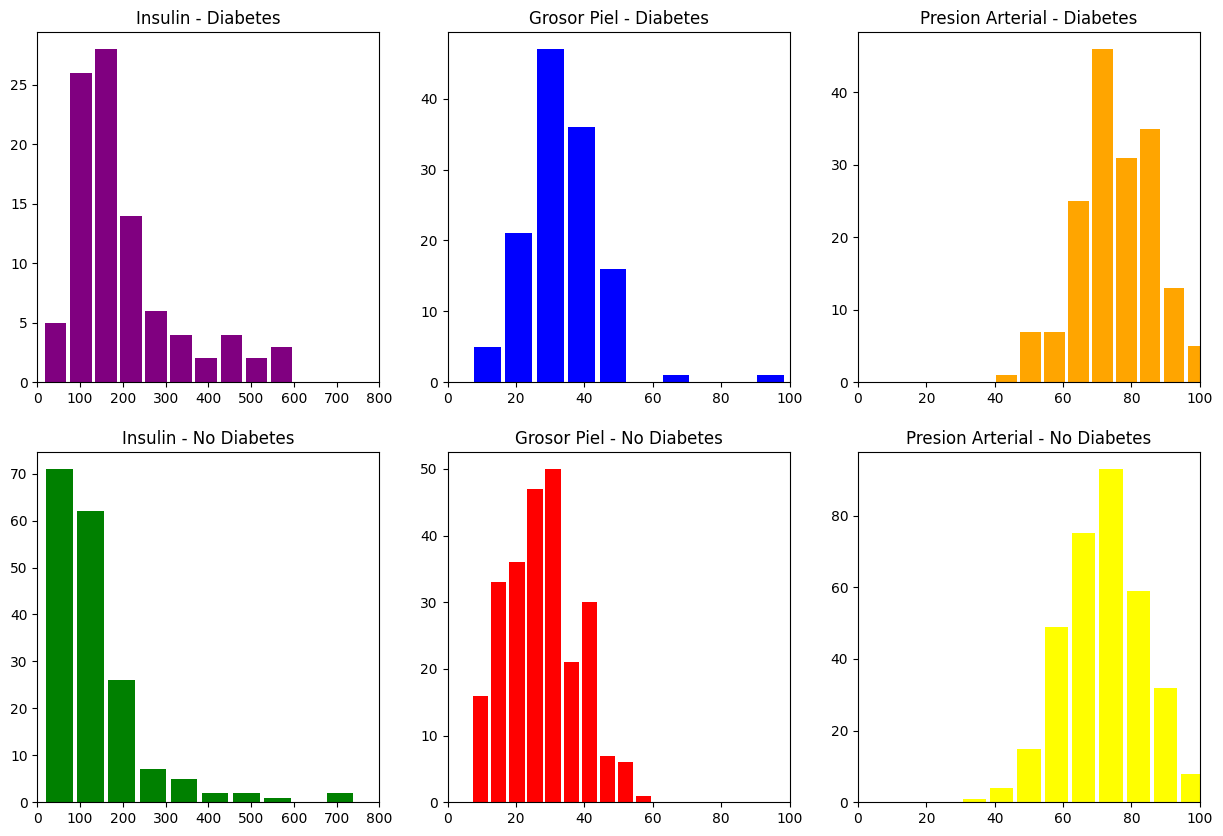

In [15]:
plt.figure(figsize=(15, 10))
plt.subplot(2, 3, 1)
plt.hist(X_train['Insulin'][y_train == 1], rwidth=0.85, color='purple')
plt.xlim(0,800,100)
plt.title('Insulin - Diabetes')
plt.subplot(2, 3, 4)
plt.hist(X_train['Insulin'][y_train == 0], rwidth=0.85, color = 'green')
plt.xlim(0,800,100)
plt.title('Insulin - No Diabetes')
plt.subplot(2, 3, 2)
plt.hist(X_train['SkinThickness'][y_train == 1], rwidth=0.85, color='blue')
plt.xlim(0,100,10)
plt.title('Grosor Piel - Diabetes')
plt.subplot(2, 3, 5)
plt.hist(X_train['SkinThickness'][y_train == 0], rwidth=0.85, color = 'red')
plt.xlim(0,100,10)
plt.title('Grosor Piel - No Diabetes')
plt.subplot(2, 3, 3)
plt.xlim(0,100,10)
plt.hist(X_train['BloodPressure'][y_train == 1], rwidth=0.85, color='orange')
plt.xlim(0,100,10)
plt.title('Presion Arterial - Diabetes')
plt.subplot(2, 3, 6)
plt.hist(X_train['BloodPressure'][y_train == 0], rwidth=0.85, color = 'yellow')
plt.xlim(0,100,10)
plt.title('Presion Arterial - No Diabetes')
plt.show()

**Los tres atributros, para los casos con y sin diabetes, tienen una distribucion sesgada, positiva y negativa. Por esta razón utilizo la mediana para imputar datos, ya que es una medida de tendencia central robusta que no se ve influenciada significativamente por los valores extremos. Los sesgos en la distribución suelen ser causados por la presencia de valores extremos en un extremo de la distribución, y estos valores pueden distorsionar la media, haciéndola poco representativa de la mayoría de los datos.**

## Calculo la mediana para imputar datos de ENTRENAMIENTO

In [17]:
'mediana de Insulin'
mediana_insulin1 = X_train['Insulin'][y_train == 1].median()
mediana_insulin0 = X_train['Insulin'][y_train == 0].median()

'mediana de SkinThickness'
mediana_skin1 = X_train['SkinThickness'][y_train == 1].median()
mediana_skin0 = X_train['SkinThickness'][y_train == 0].median()

'mediana de BloodPressure'
mediana_blood1 = X_train['BloodPressure'][y_train == 1].median()
mediana_blood0 = X_train['BloodPressure'][y_train == 0].median()

'mediana de Glucose'
mediana_glucose1 = X_train['Glucose'][y_train == 1].median()
mediana_glucose0 = X_train['Glucose'][y_train == 0].median()

'mediana de BMI'
mediana_bmi1 = X_train['BMI'][y_train == 1].median()
mediana_bmi0 = X_train['BMI'][y_train == 0].median()

In [18]:
'''IMPUTO VALORES NaN'''
X_train['Insulin'][y_train == 1] = X_train['Insulin'][y_train == 1].fillna(mediana_insulin1)
X_train['Insulin'][y_train == 0] = X_train['Insulin'][y_train == 0].fillna(mediana_insulin0)

X_train['SkinThickness'][y_train == 1] = X_train['SkinThickness'][y_train == 1].fillna(mediana_skin1)
X_train['SkinThickness'][y_train == 0] = X_train['SkinThickness'][y_train == 0].fillna(mediana_skin0)

X_train['BloodPressure'][y_train == 1]= X_train['BloodPressure'][y_train == 1].fillna(mediana_blood1)
X_train['BloodPressure'][y_train == 0]= X_train['BloodPressure'][y_train == 0].fillna(mediana_blood0)

X_train['Glucose'][y_train == 1]= X_train['Glucose'][y_train == 1].fillna(mediana_glucose1)
X_train['Glucose'][y_train == 0]= X_train['Glucose'][y_train == 0].fillna(mediana_glucose0)

X_train['BMI'][y_train == 1] = X_train['BMI'][y_train == 1].fillna(mediana_bmi1)
X_train['BMI'][y_train == 0] = X_train['BMI'][y_train == 0].fillna(mediana_bmi0)

C:\Users\felip\AppData\Local\Temp\ipykernel_4860\3290849013.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train['Insulin'][y_train == 1] = X_train['Insulin'][y_train == 1].fillna(mediana_insulin1)
C:\Users\felip\AppData\Local\Temp\ipykernel_4860\3290849013.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train['Insulin'][y_train == 0] = X_train['Insulin'][y_train == 0].fillna(mediana_insulin0)
C:\Users\felip\AppData\Local\Temp\ipykernel_4860\3290849013.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydat

In [19]:
'Datos faltantes de cada atributo'
datosImputados = X_train.isnull().sum()
print(datosImputados)

Unnamed: 0                  0
Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
dtype: int64


## Calculo la mediana para imputar datos de PRUEBA

In [28]:
'Valores NaN de X_test'
print(X_test.isnull().sum())

Unnamed: 0                  0
Pregnancies                 0
Glucose                     1
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
dtype: int64


In [30]:
'mediana de Glucose'
mediana_glucoseP1 = X_test['Glucose'][y_test == 1].median()
mediana_glucoseP0 = X_test['Glucose'][y_test == 0].median()
'mediana de Insulin'
mediana_insulinP1 = X_test['Insulin'][y_test == 1].median()
mediana_insulinP0 = X_test['Insulin'][y_test == 0].median()
'mediana de SkinThickness'
mediana_skinP1 = X_test['SkinThickness'][y_test == 1].median()
mediana_skinP0 = X_test['SkinThickness'][y_test == 0].median()

'mediana de BloodPressure'
mediana_bloodP1 = X_test['BloodPressure'][y_test == 1].median()
mediana_bloodP0 = X_test['BloodPressure'][y_test == 0].median()

'mediana de BMI'
mediana_bmiP1 = X_test['BMI'][y_test == 1].median()
mediana_bmiP0 = X_test['BMI'][y_test == 0].median()

In [31]:
'''IMPUTO VALORES NaN'''
X_test['Glucose'][y_test == 1]= X_test['Glucose'][y_test == 1].fillna(mediana_glucoseP1)
X_test['Glucose'][y_test == 0]= X_test['Glucose'][y_test == 0].fillna(mediana_glucoseP0)

X_test['Insulin'][y_test == 1]= X_test['Insulin'][y_test == 1].fillna(mediana_insulinP1)
X_test['Insulin'][y_test == 0]= X_test['Insulin'][y_test == 0].fillna(mediana_insulinP0)

X_test['SkinThickness'][y_test == 1] = X_test['SkinThickness'][y_test == 1].fillna(mediana_skinP1)
X_test['SkinThickness'][y_test == 0] = X_test['SkinThickness'][y_test == 0].fillna(mediana_skinP0)

X_test['BloodPressure'][y_test == 1] = X_test['BloodPressure'][y_test == 1].fillna(mediana_bloodP1)
X_test['BloodPressure'][y_test == 0] = X_test['BloodPressure'][y_test == 0].fillna(mediana_bloodP0)

X_test['BMI'][y_test == 1] = X_test['BMI'][y_test == 1].fillna(mediana_bmiP1)
X_test['BMI'][y_test == 0] = X_test['BMI'][y_test == 0].fillna(mediana_bmiP0)

C:\Users\felip\AppData\Local\Temp\ipykernel_4860\3033661139.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test['Glucose'][y_test == 1]= X_test['Glucose'][y_test == 1].fillna(mediana_glucoseP1)
C:\Users\felip\AppData\Local\Temp\ipykernel_4860\3033661139.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test['Glucose'][y_test == 0]= X_test['Glucose'][y_test == 0].fillna(mediana_glucoseP0)
C:\Users\felip\AppData\Local\Temp\ipykernel_4860\3033661139.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pa

In [32]:
'Valores NaN de X_train'
print(X_test.isnull().sum())

Unnamed: 0                  0
Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
dtype: int64


Después de la preparación de datos, entrene 3 clasificadores (KNN, LDA, SVM con kernel gaussiano) y compare sus desempeños (usando la métrica de Accuracy).

## 1. KNN

In [33]:
from sklearn.neighbors import KNeighborsClassifier
sknn = KNeighborsClassifier(n_neighbors=3)
sknn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [40]:
y_predKnn = sknn.predict(X_test)

from sklearn import metrics

print(metrics.accuracy_score(y_test, y_predKnn))

0.8138528138528138


---

## 2. LDA

In [39]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
lda = LinearDiscriminantAnalysis()
lda.fit(X_train, y_train)

LinearDiscriminantAnalysis()

In [41]:
y_predLda = lda.predict(X_test)

print(metrics.accuracy_score(y_test, y_predLda))

0.7619047619047619


---

In [43]:
from sklearn.svm import SVC
svm = SVC(kernel = 'rbf', gamma = 'auto')
svm.fit(X_train, y_train)


SVC(gamma='auto')

In [44]:
y_predSvm = svm.predict(X_test)
print(metrics.accuracy_score(y_test, y_predSvm))

0.6406926406926406


### **KNN: 0.8138**
### LDA: 0.7619
### SVM: 0.6406